custom Word2Vec model based on Avengers Movies

In [73]:
import pandas as pd
import numpy as np
import gensim
import nltk
import os
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\praso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\praso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\praso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\praso\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\praso\AppData\Roaming\nltk_data...
[

True

Load the data

In [3]:
files=os.listdir("Avenger")

In [4]:
files

['Avengers.Age.of.Ultron.txt',
 'Avengers.Endgame.txt',
 'Avengers.Infinity.War.txt',
 'Avengers.txt']

Breaking each file into sentences & sentence into words and append into a list

In [5]:
story=[]
for file in files:
    with open("Avenger/"+file,"r",encoding='unicode_escape') as f:
        sentences=sent_tokenize(f.read())
        for sentence in sentences:
            story.append(simple_preprocess(sentence))


In [6]:
story

[['distant',
  'explosion',
  'strucker',
  'on',
  'pa',
  'report',
  'to',
  'your',
  'stations',
  'immediately'],
 ['this', 'is', 'not', 'drill'],
 ['we', 'are', 'under', 'attack'],
 ['soldiers', 'shouting', 'indistinctly', 'we', 'are', 'under', 'attack'],
 ['grunts',
  'powering',
  'up',
  'yells',
  'grunting',
  'screaming',
  'roaring',
  'shit'],
 ['language'],
 ['jarvis', 'what', 'the', 'view', 'from', 'upstairs'],
 ['jarvis',
  'the',
  'central',
  'building',
  'is',
  'protected',
  'by',
  'some',
  'kind',
  'of',
  'energy',
  'shield'],
 ['strucker',
  'technology',
  'is',
  'well',
  'beyond',
  'any',
  'other',
  'hydra',
  'base',
  'we',
  've',
  'taken'],
 ['grunting', 'loki', 'sceptre', 'must', 'be', 'here'],
 ['strucker', 'couldn', 'mount', 'this', 'defence', 'without', 'it'],
 ['at', 'long', 'last'],
 ['soldier',
  'shouting',
  'in',
  'german',
  'at',
  'long',
  'last',
  'is',
  'lasting',
  'little',
  'long',
  'boys'],
 ['groans', 'grunts', 'yeah

In [8]:
len(story)

7814

Removing the stopWord using nltk library

In [70]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [75]:
story = [[word.lower() for word in sentence if word.lower() not in stop_words] for sentence in story]


In [29]:
story

[['distant',
  'explosion',
  'strucker',
  'pa',
  'report',
  'stations',
  'immediately'],
 ['drill'],
 ['attack'],
 ['soldiers', 'shouting', 'indistinctly', 'attack'],
 ['grunts', 'powering', 'yells', 'grunting', 'screaming', 'roaring', 'shit'],
 ['language'],
 ['jarvis', 'view', 'upstairs'],
 ['jarvis', 'central', 'building', 'protected', 'kind', 'energy', 'shield'],
 ['strucker', 'technology', 'well', 'beyond', 'hydra', 'base', 'taken'],
 ['grunting', 'loki', 'sceptre', 'must'],
 ['strucker', 'mount', 'defence', 'without'],
 ['long', 'last'],
 ['soldier',
  'shouting',
  'german',
  'long',
  'last',
  'lasting',
  'little',
  'long',
  'boys'],
 ['groans', 'grunts', 'yeah'],
 ['think', 'lost', 'element', 'surprise'],
 ['soldiers', 'groaning', 'wait', 'second'],
 ['one', 'else', 'gonna', 'deal', 'fact', 'cap', 'said', 'language'],
 ['know'],
 ['grunting', 'sighs', 'slipped'],
 ['gave', 'order', 'attack'],
 ['herr', 'strucker', 'avengers'],
 ['landed', 'far', 'woods'],
 ['perimete

**Train Word2Vec model using gensim libarary**

In [110]:
custom_model=gensim.models.Word2Vec(sentences=story,window=10,min_count=4,vector_size=200,workers=4)

In [111]:
custom_model.build_vocab(story)

In [112]:
custom_model.train(story,total_examples=custom_model.corpus_count,epochs=5)

(63768, 98990)

In [113]:
custom_model.wv.most_similar("hulk")

[('time', 0.9987391829490662),
 ('could', 0.9987192749977112),
 ('one', 0.9986997246742249),
 ('got', 0.9986913800239563),
 ('every', 0.9986458420753479),
 ('world', 0.9986386299133301),
 ('still', 0.9986321330070496),
 ('going', 0.9986127614974976),
 ('make', 0.9986093044281006),
 ('see', 0.9985771179199219)]

In [114]:
custom_model.wv.most_similar("thor")

[('stone', 0.9988518357276917),
 ('world', 0.998797595500946),
 ('time', 0.9987697601318359),
 ('power', 0.9987697005271912),
 ('make', 0.9987637996673584),
 ('get', 0.9987549781799316),
 ('people', 0.9987523555755615),
 ('like', 0.9987413883209229),
 ('one', 0.998722493648529),
 ('think', 0.9987143874168396)]

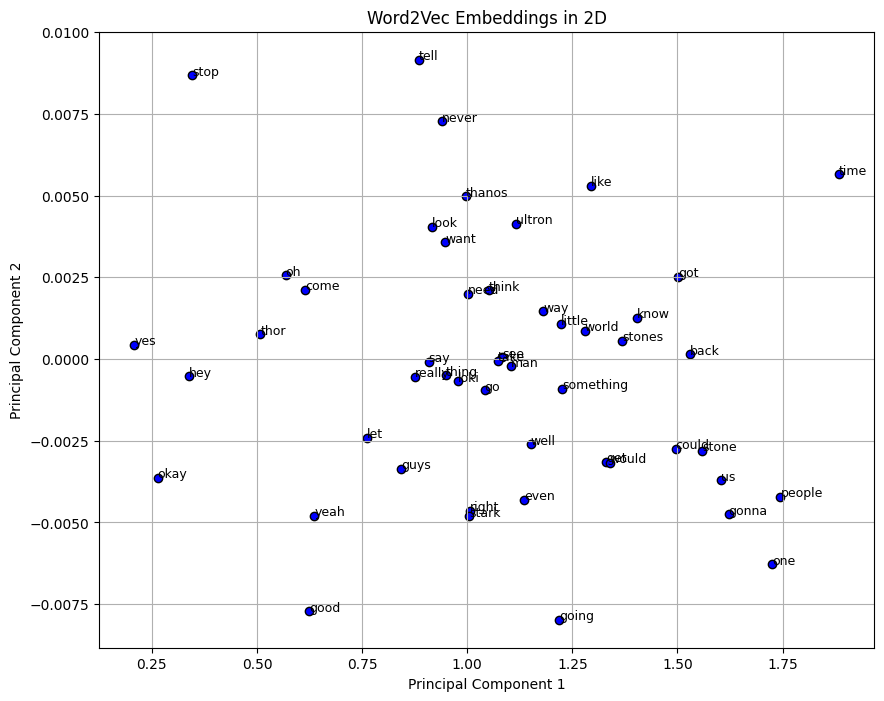

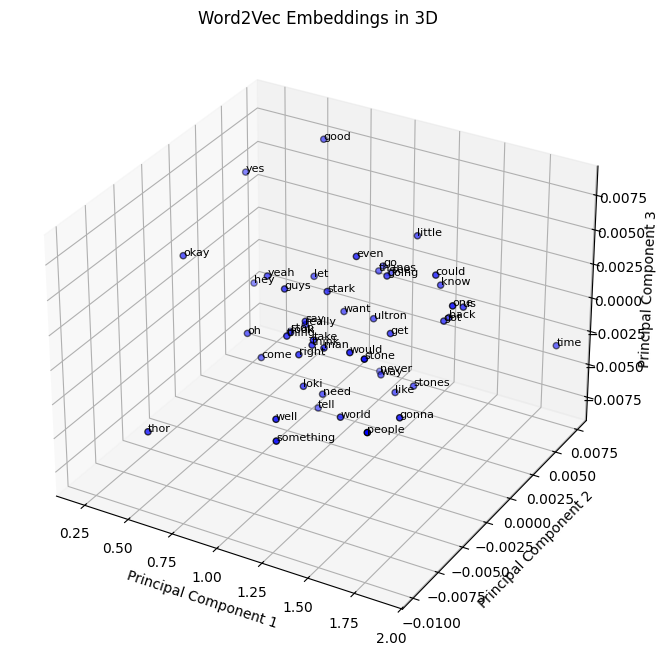

In [125]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Retrieve word vectors and the corresponding words
word_vectors = custom_model.wv.vectors
words = custom_model.wv.index_to_key

# Reduce dimensions to 2D using PCA
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(word_vectors)

# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(word_vectors)

# Function to plot in 2D
def plot_2d(reduced_2d, words, top_n=50):
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_2d[:top_n, 0], reduced_2d[:top_n, 1], c='blue', edgecolors='k')
    
    # Add labels for top N words
    for i, word in enumerate(words[:top_n]):
        plt.annotate(word, (reduced_2d[i, 0], reduced_2d[i, 1]), fontsize=9)
    
    plt.title("Word2Vec Embeddings in 2D")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

# Function to plot in 3D
def plot_3d(reduced_3d, words, top_n=50):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_3d[:top_n, 0], reduced_3d[:top_n, 1], reduced_3d[:top_n, 2], c='blue', edgecolors='k')

    # Add labels for top N words
    for i, word in enumerate(words[:top_n]):
        ax.text(reduced_3d[i, 0], reduced_3d[i, 1], reduced_3d[i, 2], word, fontsize=8)

    ax.set_title("Word2Vec Embeddings in 3D")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    plt.show()

# Plot the top 50 words in 2D
plot_2d(reduced_2d, words)

# Plot the top 50 words in 3D
plot_3d(reduced_3d, words)
